Last week:
EDA/some graphs/ visualizations that help answer your question, assessment of data quality and distribution of key features.

This week:
Task:
Regression vs Classification vs Clustering: state your features, independent & dependent variables.

If prediction: split train/test sets

Baseline Model

Evaluation Metrics - explain their tradeoffs(in write up)

Improvement Models: tuning hyperparameters, using more advanced models, or added other features.

Results! Visualizations of your performance metrics (seaborn)
Error Analysis compare your prediction vs true labels, understand the distributions of correct vs incorrect(classification), residuals (regressions)

How your model performs across different subgroups

Include qualitative analysis, what's a typical case your model gets wrong. include representative examples. Visualize instead of stating the numbers.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/data tcs/

/content/drive/MyDrive/data tcs


In [4]:
filename = "/content/drive/MyDrive/data tcs/ccus_clean.csv"

# !head -n 20 "/content/drive/MyDrive/data tcs/ccus_clean.csv"

df_ccus = pd.read_csv(filename, sep=',')

In [5]:
df_ccus.head()

,Unnamed: 0,Language,Tweet,Benefit,Concern,Perception-Fight-climate-change,Perception-Climate-friendly-technology,Perception-Extensive-R&D-needed,Perception-Better-options-than-CCS,Sentiment,Relatedness,Comment
0,0,de,",""@An_di_Arbeit @EnergyHuber That's not the po...",NaN,NaN,No,No,No,No,Positive,NaN,NaN
1,1,en,The year is 2050. The worst ravages of climate...,Reducing c. change risks,NaN,Yes,No,No,No,Positive,NaN,NaN
2,2,it,What is Carbon Capture and Storage (#Ccs)? Not...,Preventing c. change,NaN,Yes,No,No,No,Positive,NaN,NaN
3,3,fr,"@GLBouchez @TinneVdS Whatever happens, securit...",Reducing c. change risks,NaN,Yes,No,No,No,Positive,NaN,NaN
4,4,fi,Excellent thread! Towards new strengths Finlan...,NaN,NaN,No,No,No,No,Positive,NaN,NaN


In [6]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
import re

In [7]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('english'))

In [39]:
def generate_ngrams(text, n):
    text = text.lower()
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub('\S*@\S*\s?', '', text)
    text = re.sub('\'', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = word_tokenize(text)
    return [' '.join(gram) for gram in ngrams(words, n)]

df_ccus['ngrams'] = df_ccus['Tweet'].apply(lambda x: generate_ngrams(x, 2))


In [28]:
import spacy

In [40]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lemmatize(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

df_ccus['lemmas'] = df_ccus['ngrams'].apply(lemmatize)

In [41]:
df_ccus['ngrams'].head()

,ngrams
0,"[thats not, not the, the point, point all, all..."
1,"[the year, year is, is the, the worst, worst r..."
2,"[what is, is carbon, carbon capture, capture a..."
3,"[whatever happens, happens security, security ..."
4,"[excellent thread, thread towards, towards new..."


In [42]:
df_ccus['lemmas'].head()

,lemmas
0,"[that, s, not, not, the, the, point, point, al..."
1,"[the, year, year, be, be, the, the, bad, bad, ..."
2,"[what, be, be, carbon, carbon, capture, captur..."
3,"[whatever, happen, happen, security, security,..."
4,"[excellent, thread, thread, towards, towards, ..."


In [43]:
import gensim.corpora as corpora
import gensim

In [44]:
id2word = corpora.Dictionary(df_ccus['lemmas'])
texts = df_ccus['lemmas']
corpus = [id2word.doc2bow(text) for text in texts]

In [55]:
lda_ccus_10 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [56]:
topics = lda_ccus_10.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.046*"they" + 0.044*"s" + 0.024*"say" + 0.023*"could" + 0.022*"carbon" + 0.020*"their" + 0.017*"big" + 0.017*"want" + 0.016*"capture" + 0.016*"how"')
(1, '0.039*"tech" + 0.035*"t" + 0.030*"development" + 0.026*"fusion" + 0.025*"potential" + 0.023*"forest" + 0.022*"value" + 0.020*"costly" + 0.017*"biomass" + 0.016*"steel"')
(2, '0.038*"real" + 0.034*"end" + 0.029*"natural" + 0.025*"free" + 0.025*"resource" + 0.024*"sign" + 0.022*"between" + 0.021*"available" + 0.019*"esg" + 0.018*"please"')
(3, '0.061*"in" + 0.032*"investment" + 0.029*"project" + 0.028*"zero" + 0.027*"net" + 0.025*"ccus" + 0.021*"government" + 0.018*"with" + 0.016*"policy" + 0.015*"by"')
(4, '0.040*"on" + 0.033*"billion" + 0.018*"any" + 0.016*"source" + 0.014*"re" + 0.014*"energy" + 0.014*"call" + 0.014*"carboncapture" + 0.014*"after" + 0.012*"state"')
(5, '0.056*"project" + 0.040*"ccus" + 0.035*"construction" + 0.021*"read" + 0.020*"site" + 0.020*"pollution" + 0.019*"decarbonization" + 0.019*"company" + 0.016*"un

In [ ]:
from gensim.models import CoherenceModel

In [57]:
coherence_model_lda = CoherenceModel(model=lda_ccus_10, texts=df_ccus['lemmas'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.39961479305347114


In [50]:
lda_ccus_5 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [52]:
topics = lda_ccus_5.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.064*"be" + 0.056*"the" + 0.037*"carbon" + 0.036*"capture" + 0.035*"to" + 0.025*"of" + 0.023*"and" + 0.021*"that" + 0.019*"a" + 0.015*"it"')
(1, '0.043*"energy" + 0.026*"and" + 0.023*"power" + 0.020*"hydrogen" + 0.018*"nuclear" + 0.015*"produce" + 0.014*"renewable" + 0.013*"support" + 0.012*"as" + 0.011*"wind"')
(2, '0.030*"carbon" + 0.025*"climate" + 0.024*"capture" + 0.021*"on" + 0.017*"solution" + 0.016*"change" + 0.012*"of" + 0.010*"real" + 0.007*"and" + 0.007*"from"')
(3, '0.060*"and" + 0.046*"the" + 0.042*"carbon" + 0.042*"in" + 0.038*"capture" + 0.032*"of" + 0.031*"storage" + 0.028*"to" + 0.024*"co" + 0.020*"ccs"')
(4, '0.047*"be" + 0.036*"the" + 0.035*"a" + 0.031*"to" + 0.017*"I" + 0.016*"on" + 0.016*"ccus" + 0.015*"not" + 0.013*"it" + 0.012*"of"')


In [53]:
coherence_model_lda = CoherenceModel(model=lda_ccus_5, texts=df_ccus['lemmas'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.408749368685468


In [54]:
lda_ccus_15 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=15,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
topics = lda_ccus_15.print_topics(num_words=10)
for topic in topics:
    print(topic)
coherence_model_lda = CoherenceModel(model=lda_ccus_15, texts=df_ccus['lemmas'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

(0, '0.113*"project" + 0.064*"their" + 0.063*"our" + 0.049*"world" + 0.047*"these" + 0.044*"tree" + 0.041*"go" + 0.035*"m" + 0.031*"come" + 0.028*"greenwashe"')
(1, '0.112*"big" + 0.066*"tech" + 0.061*"continue" + 0.058*"include" + 0.054*"after" + 0.049*"development" + 0.045*"h" + 0.035*"two" + 0.032*"base" + 0.029*"o"')
(2, '0.311*"solution" + 0.086*"real" + 0.058*"sustainable" + 0.050*"between" + 0.036*"pool" + 0.023*"link" + 0.021*"negative" + 0.018*"horse" + 0.017*"nice" + 0.013*"unfortunately"')
(3, '0.119*"emission" + 0.080*"reduce" + 0.060*"business" + 0.049*"future" + 0.041*"decarbonization" + 0.038*"lead" + 0.029*"zero" + 0.027*"reduction" + 0.026*"important" + 0.026*"announce"')
(4, '0.070*"billion" + 0.061*"want" + 0.038*"any" + 0.033*"source" + 0.032*"government" + 0.030*"call" + 0.025*"state" + 0.025*"eu" + 0.021*"job" + 0.020*"both"')
(5, '0.195*"or" + 0.172*"like" + 0.058*"problem" + 0.040*"actually" + 0.039*"over" + 0.031*"bp" + 0.029*"electric" + 0.029*"solve" + 0.025*

In [61]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

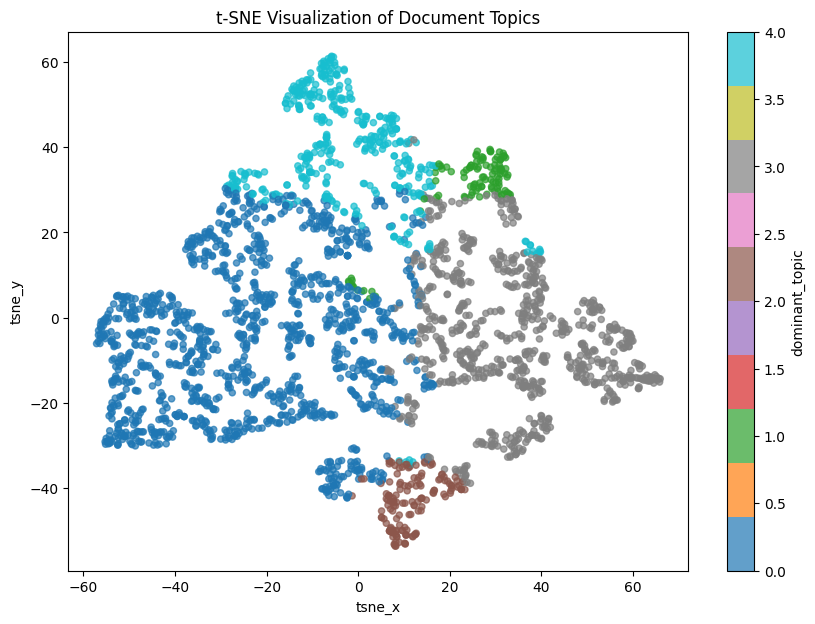

In [73]:
topic_matrix = np.array([[prob for _, prob in lda_ccus_5.get_document_topics(bow, minimum_probability=0)]
                         for bow in corpus])
tsne_model = TSNE(n_components=2, random_state=42)
tsne_coords = tsne_model.fit_transform(topic_matrix)
df_ccus['tsne_x'] = tsne_coords[:, 0]
df_ccus['tsne_y'] = tsne_coords[:, 1]
ax = df_ccus.plot.scatter(x='tsne_x', y='tsne_y', c='dominant_topic', colormap='tab10', figsize=(10,7), alpha=0.7)
plt.title('t-SNE Visualization of Document Topics')
plt.show()

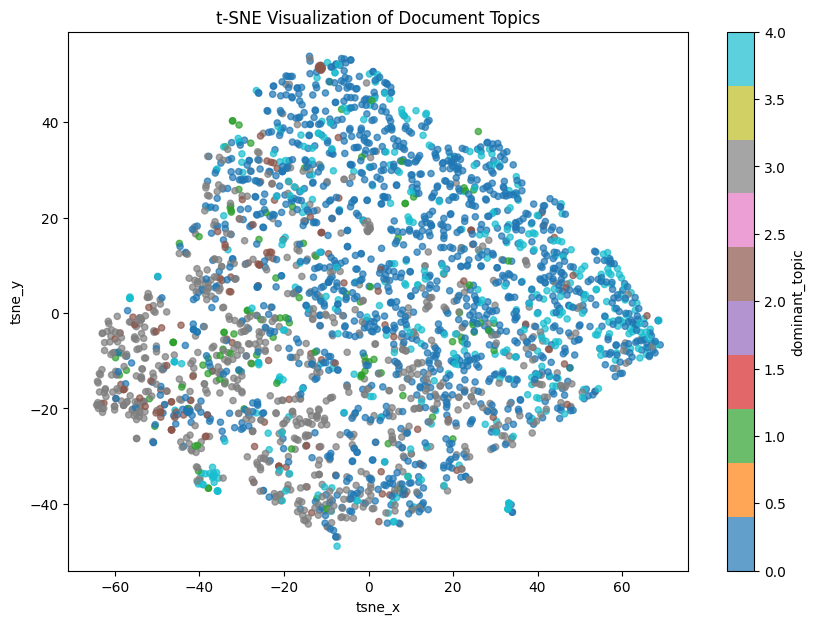

In [74]:
topic_matrix = np.array([[prob for _, prob in lda_ccus_15.get_document_topics(bow, minimum_probability=0)]
                         for bow in corpus])
tsne_model = TSNE(n_components=2, random_state=42)
tsne_coords = tsne_model.fit_transform(topic_matrix)
df_ccus['tsne_x'] = tsne_coords[:, 0]
df_ccus['tsne_y'] = tsne_coords[:, 1]
ax = df_ccus.plot.scatter(x='tsne_x', y='tsne_y', c='dominant_topic', colormap='tab10', figsize=(10,7), alpha=0.7)
plt.title('t-SNE Visualization of Document Topics')
plt.show()

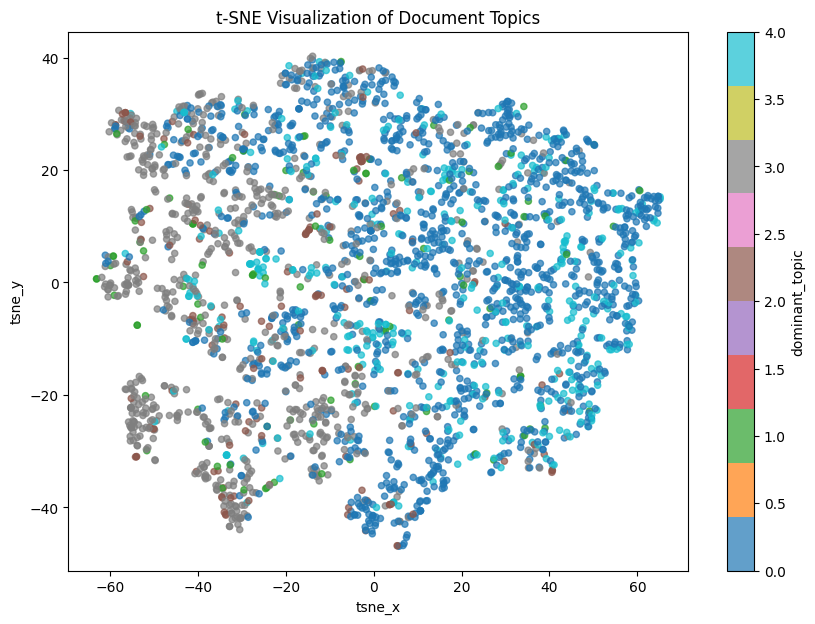

In [75]:
topic_matrix = np.array([[prob for _, prob in lda_ccus_10.get_document_topics(bow, minimum_probability=0)]
                         for bow in corpus])
tsne_model = TSNE(n_components=2, random_state=42)
tsne_coords = tsne_model.fit_transform(topic_matrix)
df_ccus['tsne_x'] = tsne_coords[:, 0]
df_ccus['tsne_y'] = tsne_coords[:, 1]
ax = df_ccus.plot.scatter(x='tsne_x', y='tsne_y', c='dominant_topic', colormap='tab10', figsize=(10,7), alpha=0.7)
plt.title('t-SNE Visualization of Document Topics')
plt.show()

In [76]:
def visualize_lda_tsne(lda_model, corpus, num_topics, title="LDA t-SNE Visualization"):
    topic_matrix = np.array([[prob for _, prob in lda_model.get_document_topics(bow, minimum_probability=0)]
                             for bow in corpus])

    tsne_model = TSNE(n_components=2, random_state=42, perplexity=30)
    tsne_coords = tsne_model.fit_transform(topic_matrix)

    dominant_topic = topic_matrix.argmax(axis=1)

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(tsne_coords[:, 0], tsne_coords[:, 1], c=dominant_topic, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, label="Topic")
    plt.title(f"{title} ({num_topics} Topics)")
    plt.show()

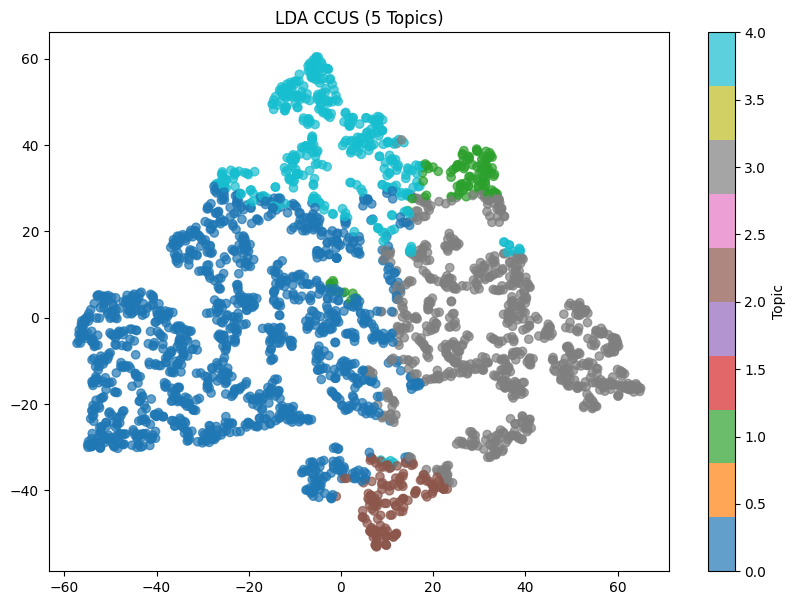

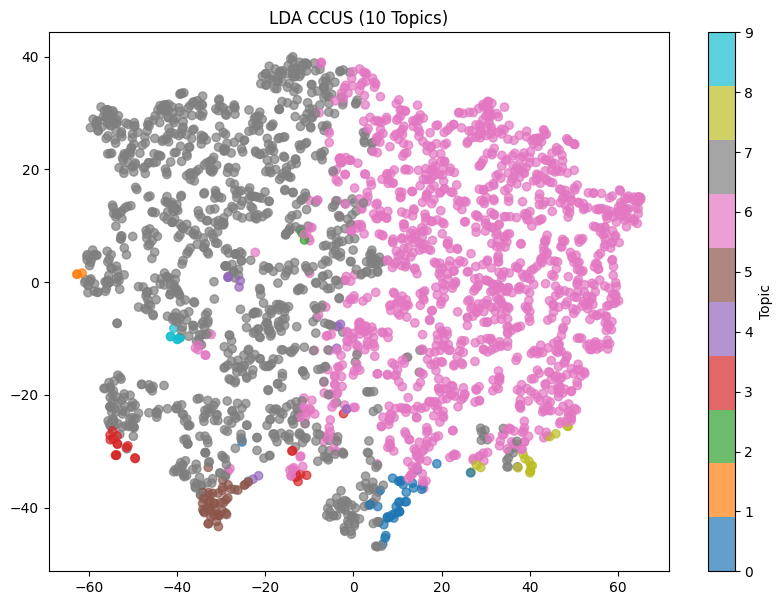

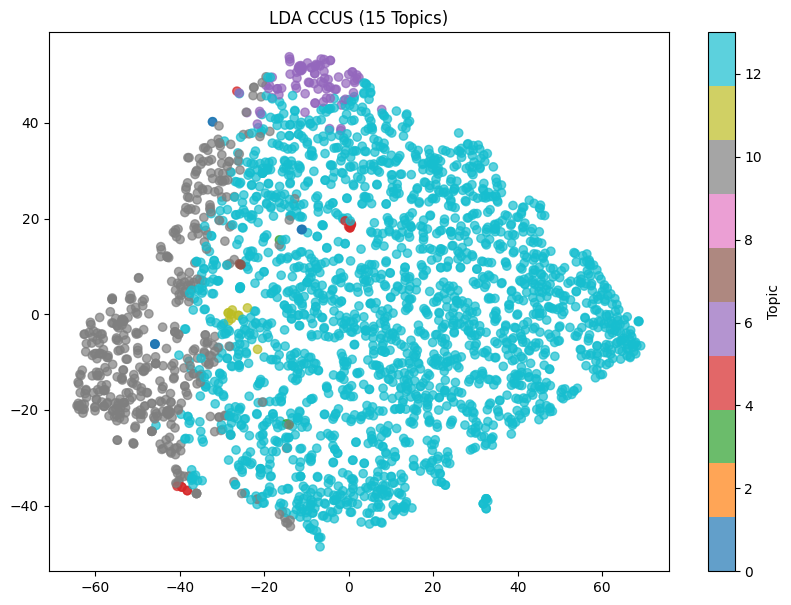

In [77]:
visualize_lda_tsne(lda_ccus_5, corpus, num_topics=5, title="LDA CCUS")
visualize_lda_tsne(lda_ccus_10, corpus, num_topics=10, title="LDA CCUS")
visualize_lda_tsne(lda_ccus_15, corpus, num_topics=15, title="LDA CCUS")